# 1.Business Understanding

Nowadays mobile phones has become a necessary in almost everyone's life. With the development of technology, mobile has more and more functions. On the market, the price of mobile varies widely depending on what features the phone has, such as RAM, Internal Memory, battery life, camera pixels etc. Suppose there is a new mobile company which has its own mobile phone created. The new phone may have various features, some features may be better than most phones on the market, while some features may be not that good compared with other mobile phone. Given this, how to find out the proper price range is an urgent task for the manager. To solve this problem, the manager asked the marketing department to collect sales data of mobile phones of various companies. However, the manager is not so good at machine learning, he does not know how to estimate price of mobiles their company creates given the collected data. Our objective is to use the collected data to help the company predict its selling price range given the fetures of its mobile phone. The company can also use the model to adjust the price of its mobile since the prices on the market may change frequently. 

# 2. Data Understanding

In [44]:
import pandas as pd
from matplotlib import pyplot as plt
import sklearn
import seaborn as sns
import numpy as np

In [45]:
# Import the dataset
df = pd.read_csv('/users/crazyworld/desktop/MLpython/lab3/train.csv')
# The dataset has 2000 instances and 21 features
display(df.shape)

(2000, 21)

In [46]:
# Check the first 5 rows of the data
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [47]:
# describe the data summary
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [48]:
# describe the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
battery_power    2000 non-null int64
blue             2000 non-null int64
clock_speed      2000 non-null float64
dual_sim         2000 non-null int64
fc               2000 non-null int64
four_g           2000 non-null int64
int_memory       2000 non-null int64
m_dep            2000 non-null float64
mobile_wt        2000 non-null int64
n_cores          2000 non-null int64
pc               2000 non-null int64
px_height        2000 non-null int64
px_width         2000 non-null int64
ram              2000 non-null int64
sc_h             2000 non-null int64
sc_w             2000 non-null int64
talk_time        2000 non-null int64
three_g          2000 non-null int64
touch_screen     2000 non-null int64
wifi             2000 non-null int64
price_range      2000 non-null int64
dtypes: float64(2), int64(19)
memory usage: 328.2 KB


In [49]:
# Create a description table
df_describe = pd.DataFrame()
pd.set_option('max_colwidth',200)
df_describe['Features'] = df.columns
df_describe['Data_Type'] = ['Integer', 'Integer','float','Integer','Integer','Integer','Integer','float','Integer','Integer','Integer','Integer','Integer',
                            'Integer','Integer','Integer','Integer','Integer','Integer','Integer','Integer']
df_describe['Description'] = [' total energy a battery can store in one time measured in mAh', 'has bluetooth or not', 'Speed at which microprocessor executes instructions ',
                             'has dual sim support or not', 'front Camera mega pixels', 'has 4G or not', 'internal memory in gigabytes','mobile depth in cm','weight of mobile phone',
                              'number of cores of processor','primary camera mega pixels','pixel resolution height','pixel resolution width','random access memory in mega bytes', 'screen height of mobile in cm','screen width of mobile in cm',
                              'longest time that a single battery charge will last when you are on a call in hours','has 3G or not','has touch screen or not','has wifi or not','price range (0: low cost, 1: medium cost, 2: high cost, 3: very high cost)']
df_describe

,Features,Data_Type,Description
0,battery_power,Integer,total energy a battery can store in one time measured in mAh
1,blue,Integer,has bluetooth or not
2,clock_speed,float,Speed at which microprocessor executes instructions
3,dual_sim,Integer,has dual sim support or not
4,fc,Integer,front Camera mega pixels
5,four_g,Integer,has 4G or not
6,int_memory,Integer,internal memory in gigabytes
7,m_dep,float,mobile depth in cm
8,mobile_wt,Integer,weight of mobile phone
9,n_cores,Integer,number of cores of processor


In [50]:
# check if there are duplicated data
idx = df.duplicated()
print('The number of duplicated data: ' + str(len(df[idx])))

The number of duplicated data: 0


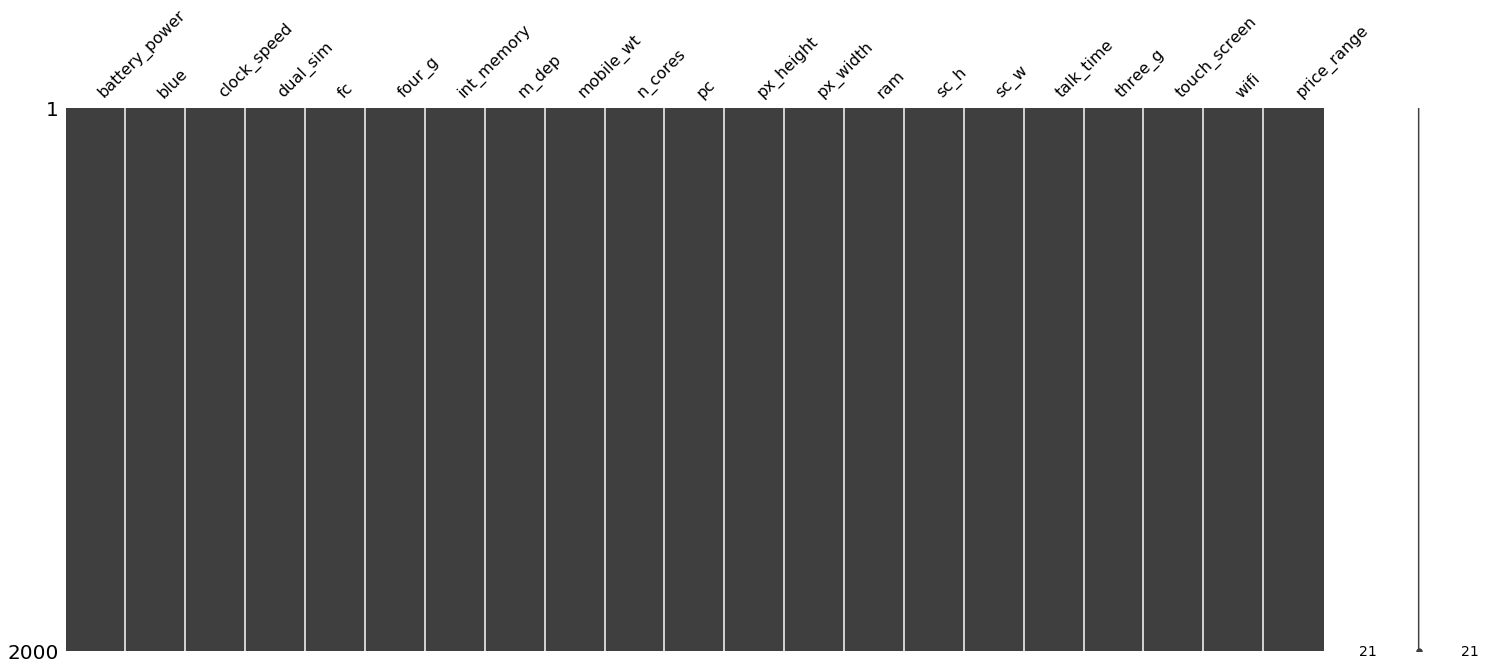

In [51]:
# use the missingno to directly find if there is any missing data
import missingno as mn
mn.matrix(df)

Based on the dataframe information and missingno matrix, there is no missing values or data for this dataset with 2000 instance and 21 features (2000 x 21).

[500 500 500 500]


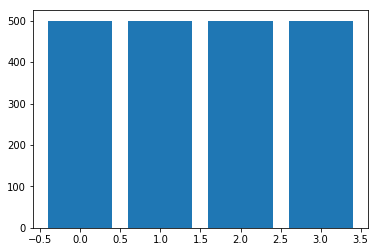

In [52]:
# Set our target as the 'charges'
target = df['price_range']
target_names='price_range'
y = target
vals = np.bincount(y)
print(vals)
plt.bar(range(len(vals)),vals)
plt.show()
# Delete the column of target from our table
df = df.drop("price_range",axis=1)

In [39]:
X = df.values
# Since each feature's data has different unit, we need to standarize the data
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

# 3. Evaluation

The metric that we will use to evaluate our algorithm’s generalization performance is F1 score. Our objective is to help the company predict its selling price range given the fetures of its mobile phone. From the producer's perspective, we want as much profit as possible. First, if our model predicts lots of high price range for the phones which actually belong to low range, the precision score of our model would be relatively low. In this case, the customer will find out that the product of this company does not worth the price, it will finally lead to low sales and low profit. Second, if our model predicts lots of low price range for the phones which actually belong to high range, the recall score of our model would be low. A phone which belonged to high price range would have better features and the cost would also be higher. If the company sells lots of high-cost phones at a low price, it will lead to a great loss to the company. Combine the above two aspects, we want our model to have  high precison and recall score, and F1 score combines these two metrics. So F1 score is the appropriate evaluation metric for our model. The higher the F1 score, the better our model will be. If some companies have a great confidence in their marketing ability, they do not worry much about the sales, which means they can afford a relatively low precision score of the model. But the company can not stand a high false negatives. In this case, we can form a cost matrix for the confusion matrix evaluation, where we have higher cost for false negatives and lower cost for false positives.